# RANDOM FOREST FOR STOCK PRICE PREDICTION~(BEARISH MARKET CYCLE)
This script uses Random Forest to predict stock price when FTSE 100 is experiencing a Bearish Market Cycle.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
# Fetch data from Yahoo Finance
data = yf.download('^FTSE', start='2007-06-01', end='2009-03-30')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Drop NA values
data.dropna(inplace=True)

In [4]:
# Specify the feature names and target variable
feature_names = ['Open', 'High', 'Low']
target = 'Close'

In [5]:
X = data[feature_names]
y = data[target]

In [6]:
# Split the dataset into training and testing sets
train_size = int(0.80 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [7]:
# Initialize and train the model with default parameters
rf_model = RandomForestRegressor()  # Using default parameters
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

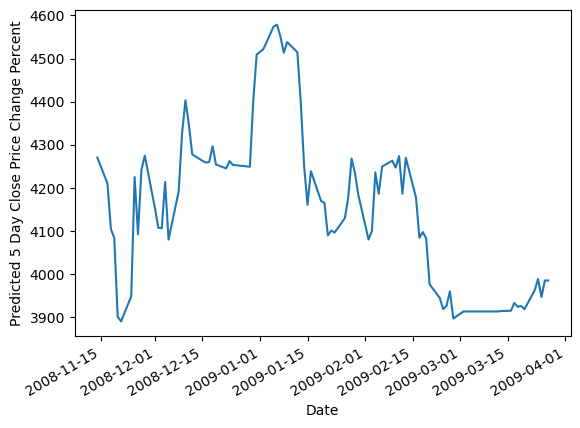

In [9]:
# Plot the predictions
y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price Change Percent")
plt.show()

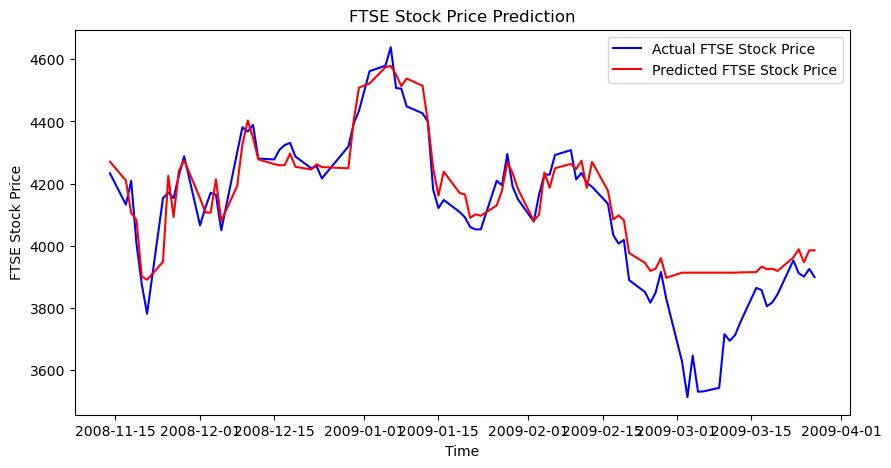

In [10]:
# Plot the actual and predicted prices
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, color='blue', label='Actual FTSE Stock Price')
plt.plot(y_test.index, y_pred, color='red', label='Predicted FTSE Stock Price')
plt.title('FTSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FTSE Stock Price')
plt.legend()
plt.show()

# EVALUATION METRICS
This metrics are used to evaluate the performance of the models compared. Cross validation is specifically included for more robust measure in comparing the various models performance.

In [11]:
# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.9604516  0.96446192 0.95879642 0.90261083 0.80567113]
Mean cross-validation score: 0.9183983808877496


In [12]:
# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 13284.940303318543


In [13]:
# Root mean square error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 115.26031538790158


In [14]:

# Mean absolute percentage error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 2.0276178484314906%
